<a href="https://colab.research.google.com/gist/jagadeesh-gajula/201316a57533a78b8272a07ef7c0cf0b/abnormal-bone-detection-with-inception-v3-complete-pipeline-mura-dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
stream = os.popen('rm -rf /')
output = stream.read()
print(output)

In [0]:
import shutil
if os.path.exists('/content/train'):
  shutil.rmtree('/content/train')
if os.path.exists('/content/test'):
  shutil.rmtree('/content/test')
if os.path.exists('/content/MURA-v1.1'):
  shutil.rmtree('/content/MURA-v1.1')

In [0]:
import os
if os.path.isfile('/content/MURA-v1.1.zip'):
  pass
else:
  stream = os.popen('wget https://cs.stanford.edu/group/mlgroup/MURA-v1.1.zip')
  output = stream.read()
  print(output)


In [4]:
stream = os.popen('ls -la')
output = stream.read()
print(output)

total 3403784
drwxr-xr-x 1 root root       4096 Nov 22 15:10 .
drwxr-xr-x 1 root root       4096 Nov 22 13:22 ..
-rw-r--r-- 1 root root  105202536 Nov 22 15:01 2019-11-22 15_00_51_model.h5
drwxr-xr-x 1 root root       4096 Nov 20 16:17 .config
-rw-r--r-- 1 root root 3380245855 Aug 20  2018 MURA-v1.1.zip
drwxr-xr-x 1 root root       4096 Nov 15 16:31 sample_data



In [0]:
import zipfile

with zipfile.ZipFile('MURA-v1.1.zip', 'r') as zip_ref:
    zip_ref.extractall(os.getcwd())

In [6]:
stream = os.popen('ls -la')
output = stream.read()
print(output)

total 3403788
drwxr-xr-x 1 root root       4096 Nov 22 15:10 .
drwxr-xr-x 1 root root       4096 Nov 22 13:22 ..
-rw-r--r-- 1 root root  105202536 Nov 22 15:01 2019-11-22 15_00_51_model.h5
drwxr-xr-x 1 root root       4096 Nov 20 16:17 .config
drwxr-xr-x 4 root root       4096 Nov 22 15:10 MURA-v1.1
-rw-r--r-- 1 root root 3380245855 Aug 20  2018 MURA-v1.1.zip
drwxr-xr-x 1 root root       4096 Nov 15 16:31 sample_data



In [7]:
import pandas as pd

data=pd.read_csv('MURA-v1.1/train_labeled_studies.csv')
data.columns=['path','outcome']
data.head(3)

,path,outcome
0,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,1
1,MURA-v1.1/train/XR_SHOULDER/patient00003/study...,1
2,MURA-v1.1/train/XR_SHOULDER/patient00004/study...,1


In [8]:
os.mkdir('/content/train')
os.mkdir('/content/train/pos')
os.mkdir('/content/train/neg')
os.mkdir('/content/test')
os.mkdir('/content/test/pos')
os.mkdir('/content/test/neg')
os.popen('ls -la')
output = stream.read()
print(output)

In [9]:
os.popen('ls -la')
output = stream.read()
print(output)

In [10]:
import shutil
from distutils.dir_util import copy_tree
import random

for i in range(len(data)):
  if data.iloc[i,:][0].find('WRIST') >0 :
    if data.iloc[i,:][1]==1:
      for file in os.listdir(data.iloc[i,:][0]):
          source=data.iloc[i,:][0]+file
          dest='/content/train/pos/'+str(i)+'.png'
          shutil.copy(source,dest)
          print(data.iloc[i,:][0],"--pos--",dest)
    if data.iloc[i,:][1]==0:
      for file in os.listdir(data.iloc[i,:][0]):
          source=data.iloc[i,:][0]+file
          dest='/content/train/neg/'+str(i)+'.png'
          shutil.copy(source,dest)
          print(data.iloc[i,:][0],"--neg--",dest)


MURA-v1.1/train/XR_WRIST/patient06359/study1_positive/ --pos-- /content/train/pos/7101.png
MURA-v1.1/train/XR_WRIST/patient06359/study1_positive/ --pos-- /content/train/pos/7101.png
MURA-v1.1/train/XR_WRIST/patient06360/study1_positive/ --pos-- /content/train/pos/7102.png
MURA-v1.1/train/XR_WRIST/patient06360/study1_positive/ --pos-- /content/train/pos/7102.png
MURA-v1.1/train/XR_WRIST/patient06360/study1_positive/ --pos-- /content/train/pos/7102.png
MURA-v1.1/train/XR_WRIST/patient06360/study1_positive/ --pos-- /content/train/pos/7102.png
MURA-v1.1/train/XR_WRIST/patient06361/study1_positive/ --pos-- /content/train/pos/7103.png
MURA-v1.1/train/XR_WRIST/patient06361/study1_positive/ --pos-- /content/train/pos/7103.png
MURA-v1.1/train/XR_WRIST/patient06361/study1_positive/ --pos-- /content/train/pos/7103.png
MURA-v1.1/train/XR_WRIST/patient06362/study1_positive/ --pos-- /content/train/pos/7104.png
MURA-v1.1/train/XR_WRIST/patient06362/study1_positive/ --pos-- /content/train/pos/7104.png

In [11]:
data=pd.read_csv('MURA-v1.1/valid_labeled_studies.csv')
data.columns=['path','outcome']
data.head()

,path,outcome
0,MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...,1
1,MURA-v1.1/valid/XR_WRIST/patient11186/study2_p...,1
2,MURA-v1.1/valid/XR_WRIST/patient11186/study3_p...,1
3,MURA-v1.1/valid/XR_WRIST/patient11187/study1_p...,1
4,MURA-v1.1/valid/XR_WRIST/patient11188/study1_p...,1


In [12]:
import shutil
from distutils.dir_util import copy_tree
import random

for i in range(len(data)):
  if data.iloc[i,:][0].find('WRIST') >0 :
    if data.iloc[i,:][1]==1:
      for file in os.listdir(data.iloc[i,:][0]):
          source=data.iloc[i,:][0]+file
          dest='/content/test/pos/'+str(i)+'.png'
          shutil.copy(source,dest)
          print(data.iloc[i,:][0],"--pos--",dest)
    if data.iloc[i,:][1]==0:
      for file in os.listdir(data.iloc[i,:][0]):
          source=data.iloc[i,:][0]+file
          dest='/content/test/neg/'+str(i)+'.png'
          shutil.copy(source,dest)
          print(data.iloc[i,:][0],"--neg--",dest)


MURA-v1.1/valid/XR_WRIST/patient11186/study1_positive/ --pos-- /content/test/pos/0.png
MURA-v1.1/valid/XR_WRIST/patient11186/study1_positive/ --pos-- /content/test/pos/0.png
MURA-v1.1/valid/XR_WRIST/patient11186/study2_positive/ --pos-- /content/test/pos/1.png
MURA-v1.1/valid/XR_WRIST/patient11186/study2_positive/ --pos-- /content/test/pos/1.png
MURA-v1.1/valid/XR_WRIST/patient11186/study2_positive/ --pos-- /content/test/pos/1.png
MURA-v1.1/valid/XR_WRIST/patient11186/study3_positive/ --pos-- /content/test/pos/2.png
MURA-v1.1/valid/XR_WRIST/patient11186/study3_positive/ --pos-- /content/test/pos/2.png
MURA-v1.1/valid/XR_WRIST/patient11186/study3_positive/ --pos-- /content/test/pos/2.png
MURA-v1.1/valid/XR_WRIST/patient11187/study1_positive/ --pos-- /content/test/pos/3.png
MURA-v1.1/valid/XR_WRIST/patient11188/study1_positive/ --pos-- /content/test/pos/4.png
MURA-v1.1/valid/XR_WRIST/patient11188/study1_positive/ --pos-- /content/test/pos/4.png
MURA-v1.1/valid/XR_WRIST/patient11188/study

# model building process



In [13]:
from numpy.random import seed
seed(1)

# Importing the Keras libraries and packages
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

import tensorflow as tf
config = tf.ConfigProto( device_count = {'GPU': 1 } ) 
sess = tf.Session(config=config) 
tf.keras.backend.set_session(sess)

# Initialising the CNN
model = Sequential()
conv_base=keras.applications.inception_v3.InceptionV3(include_top=False, 
                                                      weights='imagenet',
                                                      input_shape=(128,128,3))
model=Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(1,activation="sigmoid"))


model.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=90,
                                   brightness_range=[0.3,0.6],
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (128,128),
                                                 batch_size = 64,
                                                 color_mode="rgb",
                                                 shuffle=True,
                                                 class_mode = 'binary')


test_set = test_datagen.flow_from_directory('test',
                                            target_size = (128,128),
                                            batch_size = 32,
                                            color_mode="rgb",
                                            shuffle=True,
                                            class_mode = 'binary')

print(model.summary())
model.fit_generator(training_set,
                         epochs = 100,validation_data=test_set)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Using TensorFlow backend.


Found 3460 images belonging to 2 classes.
Found 236 images belonging to 2 classes.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 2, 2, 2048)        21802784  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_____________________________________

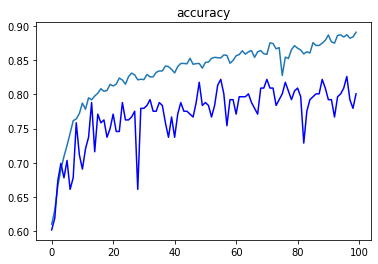

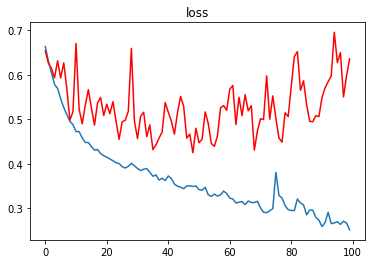

In [14]:
import matplotlib.pyplot as plt
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'],color="blue")
plt.title("accuracy")
plt.show()


plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'],color="red")
plt.title("loss")
plt.show()

In [15]:
import datetime
now=datetime.datetime.now()
current=str(now).replace(':','_').split('.')[0]+"_model.h5"
model.save(current)
print("model saved")

model saved
